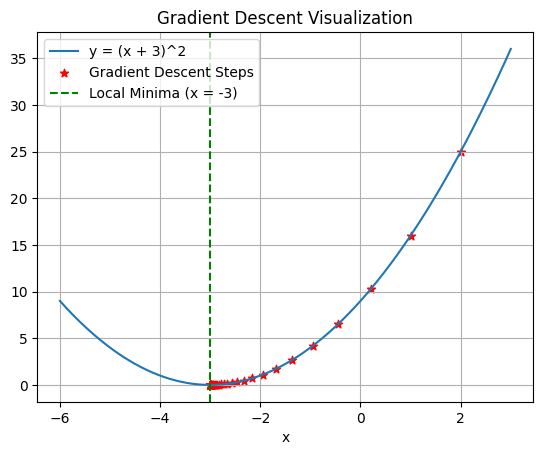

Local minimum occurs at x = -2.9999286376153647


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function and its derivative
def function(x):
    return (x + 3)**2

def derivative(x):
    return 2 * (x + 3)

# Gradient Descent function
def gradient_descent(starting_point, learning_rate, iterations):
    x = starting_point
    x_values = [x]  # Storing x values for visualization
    for i in range(iterations):
        grad = derivative(x)
        x = x - learning_rate * grad
        x_values.append(x)  # Append new x value
    return x, x_values

# Parameters
starting_point = 2
learning_rate = 0.1
iterations = 50

# Run gradient descent
final_x, x_values = gradient_descent(starting_point, learning_rate, iterations)

# Plotting the function and gradient descent steps
x_range = np.linspace(-6, 3, 400)
y_range = function(x_range)

# plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, label='y = (x + 3)^2')
plt.scatter(x_values, function(np.array(x_values)), color='red', marker='*', label='Gradient Descent Steps')
plt.title('Gradient Descent Visualization')
plt.xlabel('x')
# plt.ylabel('y')
plt.axvline(x=-3, color='green', linestyle='--', label='Local Minima (x = -3)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Local minimum occurs at x = {final_x}")


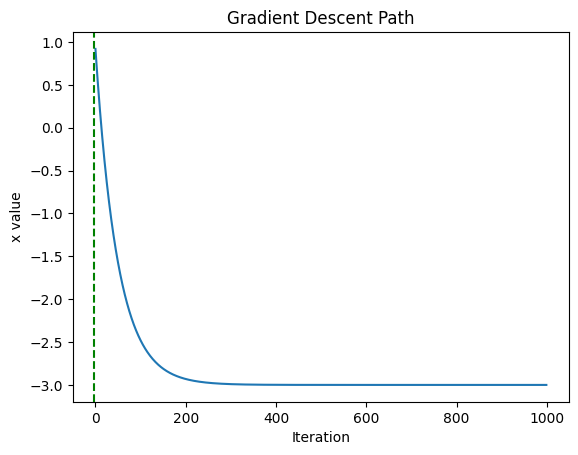

Local minimum: 4.531807003916484e-17   -2.9999999932681303


In [2]:
import matplotlib.pyplot as plt

# Define the function to minimize and its gradient
def fun(x):
    return (x + 3)**2  # Example function

def gradient(x):
    return 2 * (x + 3)  # Derivative of the function

# Initialization
x = 1  # Starting point
learning_rate = 0.01  # Smaller learning rate for stability
number_of_iterations = 1000
x_values = []

for i in range(number_of_iterations):
    x = x - learning_rate * gradient(x)
    x_values.append(x)  # Store x to plot later

# Plot the trajectory of x over iterations
plt.plot(x_values)
plt.xlabel("Iteration")
plt.ylabel("x value")
plt.axvline(x=-3, color='green', linestyle='--', label='Local Minima (x = -3)')

plt.title("Gradient Descent Path")
plt.show()

# Final local minimum value
local_minima = fun(x)
print("Local minimum:", local_minima, " ",x)

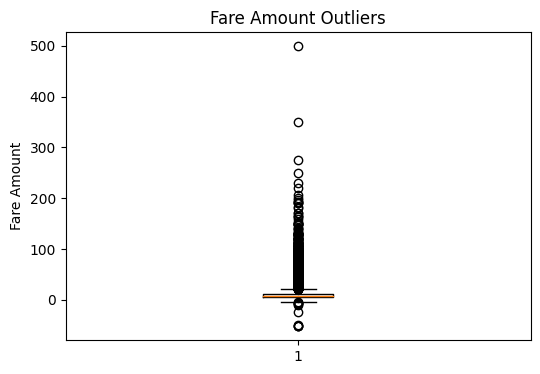

Linear Regression - RMSE: 4.14, R2 Score: 0.00
Random Forest - RMSE: 2.25, R2 Score: 0.71


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv(r"C:\Users\karan\Downloads\archive\pr\uberka.csv")


# Drop any rows with missing values for simplicity
data.dropna(inplace=True)

# Basic feature selection (assuming appropriate column names)
X = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = data['fare_amount']

# Identify outliers in fare amount using a box plot
plt.figure(figsize=(6, 4))
plt.boxplot(y)
plt.title('Fare Amount Outliers')
plt.ylabel('Fare Amount')
plt.show()

# Removing outliers in fare amount based on 1.5*IQR rule
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ~((y < (Q1 - 1.5 * IQR)) | (y > (Q3 + 1.5 * IQR)))
X, y = X[outlier_condition], y[outlier_condition]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
# lr=LinearRegression()
# lr.fit(x)
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression - RMSE: {rmse_lr:.2f}, R2 Score: {r2_lr:.2f}")
print(f"Random Forest - RMSE: {rmse_rf:.2f}, R2 Score: {r2_rf:.2f}")


In [19]:
import seaborn as sns


In [17]:
help (seaborn)

Help on package seaborn:

NAME
    seaborn - # Import seaborn objects

PACKAGE CONTENTS
    _base
    _compat
    _core (package)
    _docstrings
    _marks (package)
    _statistics
    _stats (package)
    _testing
    algorithms
    axisgrid
    categorical
    cm
    colors (package)
    distributions
    external (package)
    matrix
    miscplot
    objects
    palettes
    rcmod
    regression
    relational
    utils
    widgets

DATA
    crayons = {'Almond': '#EFDECD', 'Antique Brass': '#CD9575', 'Apricot':...
    xkcd_rgb = {'acid green': '#8ffe09', 'adobe': '#bd6c48', 'algae': '#54...

VERSION
    0.13.2

FILE
    c:\users\karan\appdata\local\programs\python\python310\lib\site-packages\seaborn\__init__.py




In [18]:
help?

Signature:   help(*args, **kwds)
Type:        _Helper
String form: Type help() for interactive help, or help(object) for help about object.
Namespace:   Python builtin
File:        c:\users\karan\appdata\local\programs\python\python310\lib\_sitebuiltins.py
Docstring:  
Define the builtin 'help'.

This is a wrapper around pydoc.help that provides a helpful message
when 'help' is typed at the Python interactive prompt.

Calling help() at the Python prompt starts an interactive help session.
Calling help(thing) prints help for the python object 'thing'.

Text(0.5, 0, 'outlier')

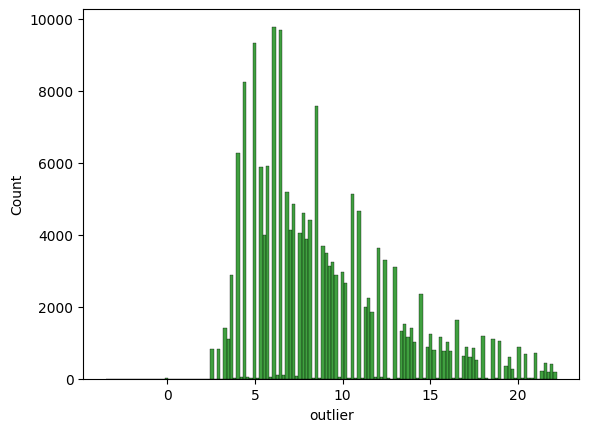

In [33]:
sns.histplot(y,color='green')
plt.xlabel('outlier')

In [25]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [30]:
data.size

1799991

In [29]:
help(size)

NameError: name 'size' is not defined

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
df = pd.read_csv('emails.csv')

# Preprocessing: Convert labels (Spam/Not Spam) to binary
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

# Split data into features (X) and target (y)
X = df['email_text']  # Replace with the actual column name for email text
y = df['label']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_tfidf, y_train)
y_pred_knn = knn.predict(X_test_tfidf)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# SVM Classifier
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Accuracy Comparison
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


In [ ]:
# Import required libraries for confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plotting confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plotting confusion matrix for SVM
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [ ]:
`sklearn.metrics` module mein kai useful functions hain jo machine learning models ke evaluation ke liye use kiye jaate hain. Aapko classification aur regression models ke performance ko evaluate karne ke liye kai tarah ke metrics milte hain.

### **Classification Metrics:**
1. **`accuracy_score()`**:
   - Model ke overall accuracy ko calculate karta hai.
   - Formula:  
     \[
     \text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}}
     \]
   - **Usage**:
     ```python
     from sklearn.metrics import accuracy_score
     accuracy = accuracy_score(y_test, y_pred)
     print("Accuracy:", accuracy)
     ```

2. **`precision_score()`**:
   - Precision batata hai ki jitni baar model ne positive (spam) predict kiya, unmein se kitni baar wo sahi thi.
   - Formula:  
     \[
     \text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}
     \]
   - **Usage**:
     ```python
     from sklearn.metrics import precision_score
     precision = precision_score(y_test, y_pred)
     print("Precision:", precision)
     ```

3. **`recall_score()`**:
   - Recall batata hai ki model ne kitni baar sahi spam ko identify kiya.
   - Formula:  
     \[
     \text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}
     \]
   - **Usage**:
     ```python
     from sklearn.metrics import recall_score
     recall = recall_score(y_test, y_pred)
     print("Recall:", recall)
     ```

4. **`f1_score()`**:
   - Precision aur recall ka harmonic mean hota hai, jo balanced evaluation deta hai jab class imbalance ho.
   - Formula:  
     \[
     \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}}
     \]
   - **Usage**:
     ```python
     from sklearn.metrics import f1_score
     f1 = f1_score(y_test, y_pred)
     print("F1 Score:", f1)
     ```

5. **`classification_report()`**:
   - Precision, recall, F1-score aur support (class ke liye instances) ka summary report deta hai.
   - **Usage**:
     ```python
     from sklearn.metrics import classification_report
     print(classification_report(y_test, y_pred))
     ```

6. **`roc_auc_score()`**:
   - ROC Curve ka area calculate karta hai. Ye binary classification ke liye useful hai, jab aapko model ke performance ko rank karna ho across different thresholds.
   - **Usage**:
     ```python
     from sklearn.metrics import roc_auc_score
     roc_auc = roc_auc_score(y_test, y_pred_prob)
     print("ROC AUC Score:", roc_auc)
     ```

7. **`confusion_matrix()`**:
   - Jaise pehle discussed kiya, yeh confusion matrix calculate karta hai.
   - **Usage**:
     ```python
     from sklearn.metrics import confusion_matrix
     cm = confusion_matrix(y_test, y_pred)
     print("Confusion Matrix:", cm)
     ```

### **Regression Metrics:**
1. **`mean_squared_error()`** (MSE):
   - Prediction aur actual value ke beech mean square error ko calculate karta hai.
   - **Formula**:  
     \[
     \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{pred}} - y_{\text{true}})^2
     \]
   - **Usage**:
     ```python
     from sklearn.metrics import mean_squared_error
     mse = mean_squared_error(y_test, y_pred)
     print("Mean Squared Error:", mse)
     ```

2. **`mean_absolute_error()`** (MAE):
   - Prediction aur actual value ke beech mean absolute error ko calculate karta hai.
   - **Formula**:  
     \[
     \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_{\text{pred}} - y_{\text{true}}|
     \]
   - **Usage**:
     ```python
     from sklearn.metrics import mean_absolute_error
     mae = mean_absolute_error(y_test, y_pred)
     print("Mean Absolute Error:", mae)
     ```

3. **`r2_score()`**:
   - R² score ko calculate karta hai, jo model ki explanatory power ko measure karta hai. Ye 0 se 1 ke beech hota hai, jahan 1 best prediction ko denote karta hai.
   - **Formula**:  
     \[
     R^2 = 1 - \frac{\sum_{i=1}^{n} (y_{\text{true}} - y_{\text{pred}})^2}{\sum_{i=1}^{n} (y_{\text{true}} - \bar{y})^2}
     \]
   - **Usage**:
     ```python
     from sklearn.metrics import r2_score
     r2 = r2_score(y_test, y_pred)
     print("R2 Score:", r2)
     ```

### **Usage Summary:**

- **Classification Metrics** are primarily used when you're dealing with problems like spam detection, where you want to classify instances into distinct classes.
- **Regression Metrics** are used when you're predicting continuous values, like predicting prices, temperatures, etc.

### Example Code for Classification Metrics:

```python
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming y_test and y_pred are available
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Detailed classification report
print(classification_report(y_test, y_pred))
```

### Summary:
- **Classification metrics** help in understanding how well your classification model is performing.
- **Regression metrics** are used for continuous value prediction, providing insights into the model's error.


In [ ]:
`y_pred` ko aap model ki prediction se nikaalte hain. Jab aap apna classifier ya regressor model train karte ho, uske baad **predict()** method ka use karke aap test data (ya kisi new data) pe predictions nikaal sakte hain.

### **Steps to Get `y_pred`:**

1. **Model ko Train karo:** Sabse pehle aapko apne model ko training data pe train karna hota hai.
2. **Prediction karo:** Model ke trained hone ke baad, aap usse `predict()` method ka use karke test data pe predictions nikaal sakte hain.

### **Example for Classification (KNN or SVM):**

#### 1. **K-Nearest Neighbors Example:**

```python
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Dataset (X, y) assume kiya gaya hai
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN model initialize karo
knn_model = KNeighborsClassifier(n_neighbors=5)

# Model ko train karo
knn_model.fit(X_train, y_train)

# Predictions nikaalo
y_pred_knn = knn_model.predict(X_test)

# y_pred_knn ko confusion matrix, accuracy etc. ke liye use kar sakte hain
print(y_pred_knn)
```

#### 2. **Support Vector Machine (SVM) Example:**

```python
from sklearn.svm import SVC

# SVM model initialize karo
svm_model = SVC(kernel='linear')

# Model ko train karo
svm_model.fit(X_train, y_train)

# Predictions nikaalo
y_pred_svm = svm_model.predict(X_test)

# y_pred_svm ko confusion matrix, accuracy etc. ke liye use kar sakte hain
print(y_pred_svm)
```

### **Explanation:**

- **`X_train`, `y_train`:** Training data (features and labels).
- **`X_test`:** Test data jiska label aapko predict karna hai.
- **`y_pred_knn` or `y_pred_svm`:** Model ke predicted labels hain, jo test data ke liye model ne predict kiye.

### **Example for Regression (Linear Regression):**

```python
from sklearn.linear_model import LinearRegression

# Linear Regression model initialize karo
reg_model = LinearRegression()

# Model ko train karo
reg_model.fit(X_train, y_train)

# Predictions nikaalo
y_pred_reg = reg_model.predict(X_test)

# y_pred_reg ko MSE, R2 score etc. ke liye use kar sakte hain
print(y_pred_reg)
```

### **Points to Remember:**
- **`fit()` method** se model training hota hai.
- **`predict()` method** se model predictions nikaali jaati hain.
- Predictions (`y_pred`) ko evaluate karne ke liye aap **metrics** jaise `accuracy_score`, `confusion_matrix`, etc. ka use karte hain.

### **In Summary:**
`y_pred` aapke model ke predictions ko represent karta hai, jo aap test data ke liye `predict()` method ke through nikaalte hain.